In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Loading a libraries 

In [2]:
from google.cloud import bigquery
import warnings
warnings.filterwarnings('ignore')
import wordcloud
import matplotlib.pyplot as plt

In [3]:
client=bigquery.Client()

Using Kaggle's public dataset BigQuery integration.


In [4]:
hacker_news_ref=client.dataset('hacker_news',project="bigquery-public-data")

In [5]:
hacker_news=client.get_dataset(hacker_news_ref)

In [6]:
tables=list(client.list_tables(hacker_news))

In [7]:
for table in tables:
    print(table.table_id)

comments
full
full_201510
stories


In [8]:
comment_table_ref=hacker_news_ref.table('comments')

In [9]:
full_table_ref=hacker_news_ref.table('full')

In [10]:
full_201510_table_ref=hacker_news_ref.table('full_201510')

In [11]:
stories_table_ref=hacker_news_ref.table('stories')

In [12]:
comment_table=client.get_table(comment_table_ref)

In [13]:
full_table=client.get_table(full_table_ref)

In [14]:
full_201510_table=client.get_table(full_201510_table_ref)

In [15]:
stories_table=client.get_table(stories_table_ref)

In [16]:
comment_table.schema

[SchemaField('id', 'INTEGER', 'NULLABLE', 'Unique comment ID', (), None),
 SchemaField('by', 'STRING', 'NULLABLE', 'Username of commenter', (), None),
 SchemaField('author', 'STRING', 'NULLABLE', 'Username of author', (), None),
 SchemaField('time', 'INTEGER', 'NULLABLE', 'Unix time', (), None),
 SchemaField('time_ts', 'TIMESTAMP', 'NULLABLE', 'Human readable time in UTC (format: YYYY-MM-DD hh:mm:ss)', (), None),
 SchemaField('text', 'STRING', 'NULLABLE', 'Comment text', (), None),
 SchemaField('parent', 'INTEGER', 'NULLABLE', 'Parent comment ID', (), None),
 SchemaField('deleted', 'BOOLEAN', 'NULLABLE', 'Is deleted?', (), None),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', 'Is dead?', (), None),
 SchemaField('ranking', 'INTEGER', 'NULLABLE', 'Comment ranking', (), None)]

In [17]:
full_table.schema

[SchemaField('title', 'STRING', 'NULLABLE', 'Story title', (), None),
 SchemaField('url', 'STRING', 'NULLABLE', 'Story url', (), None),
 SchemaField('text', 'STRING', 'NULLABLE', 'Story or comment text', (), None),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', 'Is dead?', (), None),
 SchemaField('by', 'STRING', 'NULLABLE', "The username of the item's author.", (), None),
 SchemaField('score', 'INTEGER', 'NULLABLE', 'Story score', (), None),
 SchemaField('time', 'INTEGER', 'NULLABLE', 'Unix time', (), None),
 SchemaField('timestamp', 'TIMESTAMP', 'NULLABLE', 'Timestamp for the unix time', (), None),
 SchemaField('type', 'STRING', 'NULLABLE', 'Type of details (comment, comment_ranking, poll, story, job, pollopt)', (), None),
 SchemaField('id', 'INTEGER', 'NULLABLE', "The item's unique id.", (), None),
 SchemaField('parent', 'INTEGER', 'NULLABLE', 'Parent comment ID', (), None),
 SchemaField('descendants', 'INTEGER', 'NULLABLE', 'Number of story or poll descendants', (), None),
 SchemaField

In [18]:
full_201510_table.schema

[SchemaField('by', 'STRING', 'NULLABLE', 'Username of commenter or submitter', (), None),
 SchemaField('score', 'INTEGER', 'NULLABLE', 'Story score', (), None),
 SchemaField('time', 'INTEGER', 'NULLABLE', 'Unix time', (), None),
 SchemaField('title', 'STRING', 'NULLABLE', 'Story title', (), None),
 SchemaField('type', 'STRING', 'NULLABLE', 'Type of details (comment, comment_ranking, poll, story, job, pollopt)', (), None),
 SchemaField('url', 'STRING', 'NULLABLE', 'Story url', (), None),
 SchemaField('text', 'STRING', 'NULLABLE', 'Story or comment text', (), None),
 SchemaField('parent', 'INTEGER', 'NULLABLE', 'Parent comment ID', (), None),
 SchemaField('deleted', 'BOOLEAN', 'NULLABLE', 'Is deleted?', (), None),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', 'Is dead?', (), None),
 SchemaField('descendants', 'INTEGER', 'NULLABLE', 'Number of story or poll descendants', (), None),
 SchemaField('id', 'INTEGER', 'NULLABLE', 'Unique type ID', (), None),
 SchemaField('ranking', 'INTEGER', 'NUL

In [19]:
stories_table.schema

[SchemaField('id', 'INTEGER', 'NULLABLE', 'Unique story ID', (), None),
 SchemaField('by', 'STRING', 'NULLABLE', 'Username of submitter', (), None),
 SchemaField('score', 'INTEGER', 'NULLABLE', 'Story score', (), None),
 SchemaField('time', 'INTEGER', 'NULLABLE', 'Unix time', (), None),
 SchemaField('time_ts', 'TIMESTAMP', 'NULLABLE', 'Human readable time in UTC (format: YYYY-MM-DD hh:mm:ss)', (), None),
 SchemaField('title', 'STRING', 'NULLABLE', 'Story title', (), None),
 SchemaField('url', 'STRING', 'NULLABLE', 'Story url', (), None),
 SchemaField('text', 'STRING', 'NULLABLE', 'Story text', (), None),
 SchemaField('deleted', 'BOOLEAN', 'NULLABLE', 'Is deleted?', (), None),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', 'Is dead?', (), None),
 SchemaField('descendants', 'INTEGER', 'NULLABLE', 'Number of story descendants', (), None),
 SchemaField('author', 'STRING', 'NULLABLE', 'Username of author', (), None)]

In [20]:
client.list_rows(comment_table,max_results=20).to_dataframe()

,id,by,author,time,time_ts,text,parent,deleted,dead,ranking
0,9734136,None,None,1434565400,2015-06-17 18:23:20+00:00,None,9733698,True,None,0
1,4921158,None,None,1355496966,2012-12-14 14:56:06+00:00,None,4921100,True,None,0
2,7500568,None,None,1396261158,2014-03-31 10:19:18+00:00,None,7499385,True,None,0
3,8909635,None,None,1421627275,2015-01-19 00:27:55+00:00,None,8901135,True,None,0
4,9256463,None,None,1427204705,2015-03-24 13:45:05+00:00,None,9256346,True,None,0
5,6158185,None,None,1375671544,2013-08-05 02:59:04+00:00,None,6158065,True,None,0
6,4731966,None,None,1351852339,2012-11-02 10:32:19+00:00,None,4731908,True,None,0
7,6181867,None,None,1375995581,2013-08-08 20:59:41+00:00,None,6181621,True,None,0
8,6639584,None,None,1383108931,2013-10-30 04:55:31+00:00,None,6638793,True,None,0
9,2183690,None,None,1296931832,2011-02-05 18:50:32+00:00,None,2183581,True,None,0


In [21]:
client.list_rows(full_table,max_results=20).to_dataframe()

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,"I would rather just have wired earbuds, period...",None,zeveb,NaN,1591717736,2020-06-09 15:48:56+00:00,comment,23467666,23456782,NaN,NaN,None
1,None,None,DNS?,None,nly,NaN,1572810465,2019-11-03 19:47:45+00:00,comment,21436112,21435130,NaN,NaN,None
2,None,None,These benchmarks seem pretty good. Filterable...,None,mrkeen,NaN,1591717727,2020-06-09 15:48:47+00:00,comment,23467665,23467426,NaN,NaN,None
3,None,None,Oh really?<p>* Excel alone uses 86.1MB of priv...,None,oceanswave,NaN,1462987532,2016-05-11 17:25:32+00:00,comment,11677248,11676886,NaN,NaN,None
4,None,None,These systems are useless. Of the many flaws:...,None,nyxxie,NaN,1572810473,2019-11-03 19:47:53+00:00,comment,21436113,21435025,NaN,NaN,None
5,None,None,<i>I don&#x27;t worry about the server</i> and...,None,dahfizz,NaN,1566231278,2019-08-19 16:14:38+00:00,comment,20739051,20738305,NaN,NaN,None
6,None,None,Why do you take it as a given that the Secreta...,None,chatmasta,NaN,1425350594,2015-03-03 02:43:14+00:00,comment,9135815,9135800,NaN,NaN,None
7,None,None,Let me know what you guys think so far and if ...,None,augustin1989,NaN,1394076499,2014-03-06 03:28:19+00:00,comment,7351690,7351684,NaN,NaN,None
8,None,None,I often feel that the main result of this priv...,None,jaynetics,NaN,1572810482,2019-11-03 19:48:02+00:00,comment,21436115,21435981,NaN,NaN,None
9,None,None,That is exactly why I generally prefer median-...,None,bugra,NaN,1393290376,2014-02-25 01:06:16+00:00,comment,7294506,7293801,NaN,NaN,None


In [22]:
client.list_rows(full_201510_table,max_results=20).to_dataframe()

,by,score,time,title,type,url,text,parent,deleted,dead,descendants,id,ranking
0,aneesh,NaN,1247986104,None,comment,None,Saying the Putnam is a next step from AMC12 pr...,712674,None,None,NaN,712688,NaN
1,macspoofing,NaN,1390822435,None,comment,None,Everything is a &#x27;hack&#x27; these days.,7129124,None,None,NaN,7129815,NaN
2,phamilton,NaN,1250202364,None,comment,None,"<a href=""http://paulgraham.com/wealth.html"" re...",761833,None,None,NaN,761858,NaN
3,alecthomas,NaN,1398091163,None,comment,None,That is correct. The service discovery is call...,7619967,None,None,NaN,7621229,NaN
4,ph0rque,NaN,1202479877,None,comment,None,Да просто...,111986,None,None,NaN,112066,NaN
5,6stringmerc,NaN,1423766551,None,comment,None,"Well, I think you&#x27;re misapplying your pri...",9040449,None,None,NaN,9040473,NaN
6,matznerd,NaN,1423786919,None,comment,None,Everything on HN looks so square after playing...,9038873,None,None,NaN,9042196,NaN
7,mahyarm,NaN,1423845408,None,comment,None,"If you want to work at those companies, your t...",9044833,None,None,NaN,9045167,NaN
8,jqueryin,NaN,1423856190,None,comment,None,"LTE is spotty. Looking at coverage maps, it do...",9046417,None,None,NaN,9046669,NaN
9,jacquesm,NaN,1350473229,None,comment,None,All it takes is for some political body to lea...,4663900,None,None,NaN,4663909,NaN


In [23]:
client.list_rows(stories_table,max_results=20).to_dataframe()

,id,by,score,time,time_ts,title,url,text,deleted,dead,descendants,author
0,6988445,cflick,0,1388454902,2013-12-31 01:55:02+00:00,Appshare,http://chadflick.ws/appshare.html,Did facebook or angrybirds pay you? We will!,None,True,NaN,cflick
1,7047571,Rd2,1,1389562985,2014-01-12 21:43:05+00:00,Java in startups,,"Hello, hacker news!<p>Have any of you used jav...",None,True,NaN,Rd2
2,9157712,mo0,1,1425657937,2015-03-06 16:05:37+00:00,Show HN: Discover what songs were used in YouT...,http://www.mooma.sh/,The user can paste a media url(currently only ...,None,True,NaN,mo0
3,8127403,ad11,1,1407052667,2014-08-03 07:57:47+00:00,"My poker project, what do you think?",,"Hi guys, what do you think about my poker proj...",None,True,NaN,ad11
4,6933158,emyy,1,1387432701,2013-12-19 05:58:21+00:00,Christmas Crafts Ideas - Easy and Simple Famil...,http://www.winxdvd.com/resource/christmas-craf...,There are some free Christmas craft ideas to m...,None,True,NaN,emyy
5,7676876,jsnk,1,1398896640,2014-04-30 22:24:00+00:00,Should an engineer go deeper or broader?,,"Generally speaking, should an engineer try to ...",None,True,NaN,jsnk
6,9987263,kull,1,1438441736,2015-08-01 15:08:56+00:00,"Tell HN: Friendly reminder, if on Sat you're c...",,instead of working on your startup&#x2F;idea 6...,None,True,NaN,kull
7,7809135,meoz,1,1401271178,2014-05-28 09:59:38+00:00,Great time tracker SalaryBook for iPad turned ...,http://bit.ly/WvOSXC,"Freelancers, consultants, and professionals ca...",None,True,NaN,meoz
8,8555553,Gribz,1,1415088736,2014-11-04 08:12:16+00:00,Can someone recommend a good web hosting site,,SO my friend got asked to find a good free web...,None,True,NaN,Gribz
9,7550905,glvsd,1,1396920785,2014-04-08 01:33:05+00:00,Why is fish oil good for your eyes?,http://www.globallaservision.com/blog/fish-oil...,You have questions? We have the answers. Healt...,None,True,NaN,glvsd


# Query 1

# Recent studies have found that many forums tend to be dominated by a
# very small fraction of users. Is this true of Hacker News?

In [24]:
query="""SELECT 
  f.by AS username, 
  COUNT(*) AS comment_count, 
  COUNT(*) / t.total_comments * 100 AS percentage_of_comments
FROM 
  `bigquery-public-data.hacker_news.full` AS f
JOIN 
  (SELECT COUNT(*) AS total_comments FROM `bigquery-public-data.hacker_news.full`) AS t
ON 
  1=1
GROUP BY 
  username, t.total_comments
ORDER BY 
  comment_count DESC
 """

In [25]:
dry_run_config=bigquery.QueryJobConfig(dry_run=True)

dry_run_query_job=client.query(query,job_config=dry_run_config)

print(f"this query will be processed in {dry_run_query_job.total_bytes_processed} bytes")

this query will be processed in 335987592 bytes


In [26]:
# Only run the query if it's less than 1 GB
ONE_GB = 1000*1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)

# Set up the query (will only run if it's less than 1 GB)
safe_query_job = client.query(query, job_config=safe_config)

# API request - try to run the query, and return a pandas DataFrame
job_post_scores = safe_query_job.to_dataframe()

# Print average score for job posts
job_post_scores.head(25)

,username,comment_count,percentage_of_comments
0,None,995099,2.959789
1,dang,58773,0.174812
2,tptacek,58511,0.174033
3,jacquesm,50798,0.151092
4,pjmlp,49604,0.147540
5,dragonwriter,46333,0.137811
6,rbanffy,45871,0.136437
7,coldtea,31421,0.093458
8,TeMPOraL,29342,0.087274
9,dredmorbius,26568,0.079023


# Query 2

# Hacker News has received complaints that the site is biased towards Y
# Combinator startups. Do the data support this?

In [27]:
query="""SELECT s.id AS story_id, s.title, COUNT(c.id) AS num_comments
FROM `bigquery-public-data.hacker_news.comments` AS c
JOIN `bigquery-public-data.hacker_news.stories` AS s
ON c.parent = s.id
GROUP BY s.id, s.title
ORDER BY num_comments DESC
"""

In [28]:
dry_run_config=bigquery.QueryJobConfig(dry_run=True)

dry_run_query_job=client.query(query,job_config=dry_run_config)

print(f"this query will be processed in {dry_run_query_job.total_bytes_processed} bytes")

this query will be processed in 238414539 bytes


In [29]:
# Only run the query if it's less than 1 GB
ONE_GB = 1000*1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)

# Set up the query (will only run if it's less than 1 GB)
safe_query_job = client.query(query, job_config=safe_config)

# API request - try to run the query, and return a pandas DataFrame
job_post_scores = safe_query_job.to_dataframe()

# Print average score for job posts
job_post_scores.head(25)

,story_id,title,num_comments
0,363,Please tell us what features you'd like in new...,1311
1,9812245,Ask HN: Who is hiring? (July 2015),902
2,9996333,Ask HN: Who is hiring? (August 2015),850
3,9303396,Ask HN: Who is hiring? (April 2015),785
4,10152809,Ask HN: Who is hiring? (September 2015),733
5,9471287,Ask HN: Who is hiring? (May 2015),697
6,10311580,Ask HN: Who is hiring? (October 2015),645
7,9639001,Ask HN: Who is hiring? (June 2015),635
8,9127232,Ask HN: Who is hiring? (March 2015),529
9,8980047,Ask HN: Who is hiring? (February 2015),526


In [30]:
stories_df=client.list_rows(stories_table).to_dataframe()

In [31]:
stories_df.shape

(1959809, 12)

In [32]:
stories_df.head(10)

,id,by,score,time,time_ts,title,url,text,deleted,dead,descendants,author
0,6988445,cflick,0.0,1.388455e+09,2013-12-31 01:55:02+00:00,Appshare,http://chadflick.ws/appshare.html,Did facebook or angrybirds pay you? We will!,None,True,NaN,cflick
1,7047571,Rd2,1.0,1.389563e+09,2014-01-12 21:43:05+00:00,Java in startups,,"Hello, hacker news!<p>Have any of you used jav...",None,True,NaN,Rd2
2,9157712,mo0,1.0,1.425658e+09,2015-03-06 16:05:37+00:00,Show HN: Discover what songs were used in YouT...,http://www.mooma.sh/,The user can paste a media url(currently only ...,None,True,NaN,mo0
3,8127403,ad11,1.0,1.407053e+09,2014-08-03 07:57:47+00:00,"My poker project, what do you think?",,"Hi guys, what do you think about my poker proj...",None,True,NaN,ad11
4,6933158,emyy,1.0,1.387433e+09,2013-12-19 05:58:21+00:00,Christmas Crafts Ideas - Easy and Simple Famil...,http://www.winxdvd.com/resource/christmas-craf...,There are some free Christmas craft ideas to m...,None,True,NaN,emyy
5,7676876,jsnk,1.0,1.398897e+09,2014-04-30 22:24:00+00:00,Should an engineer go deeper or broader?,,"Generally speaking, should an engineer try to ...",None,True,NaN,jsnk
6,9987263,kull,1.0,1.438442e+09,2015-08-01 15:08:56+00:00,"Tell HN: Friendly reminder, if on Sat you're c...",,instead of working on your startup&#x2F;idea 6...,None,True,NaN,kull
7,7809135,meoz,1.0,1.401271e+09,2014-05-28 09:59:38+00:00,Great time tracker SalaryBook for iPad turned ...,http://bit.ly/WvOSXC,"Freelancers, consultants, and professionals ca...",None,True,NaN,meoz
8,8555553,Gribz,1.0,1.415089e+09,2014-11-04 08:12:16+00:00,Can someone recommend a good web hosting site,,SO my friend got asked to find a good free web...,None,True,NaN,Gribz
9,7550905,glvsd,1.0,1.396921e+09,2014-04-08 01:33:05+00:00,Why is fish oil good for your eyes?,http://www.globallaservision.com/blog/fish-oil...,You have questions? We have the answers. Healt...,None,True,NaN,glvsd


In [33]:
stories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959809 entries, 0 to 1959808
Data columns (total 12 columns):
 #   Column       Dtype              
---  ------       -----              
 0   id           int64              
 1   by           object             
 2   score        float64            
 3   time         float64            
 4   time_ts      datetime64[ns, UTC]
 5   title        object             
 6   url          object             
 7   text         object             
 8   deleted      object             
 9   dead         object             
 10  descendants  float64            
 11  author       object             
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(7)
memory usage: 179.4+ MB


In [34]:
# Use a list comprehension to exclude None values
my_list_without_none = [string for string in stories_df['title'] if string is not None]

# Concatenate the remaining strings into a single string
my_string = " ".join(my_list_without_none)

In [35]:
top_10 = pd.Series(my_string.split()).value_counts().sort_values(ascending=False).head(10)

# print the top 10 occurrences
print(top_10)

to     279353
the    235010
of     203881
for    188340
a      176217
and    167307
in     166154
The    156974
on     101591
HN:     99321
dtype: int64


In [36]:
#the
query="""SELECT title, time_ts
FROM `bigquery-public-data.hacker_news.stories`
WHERE REGEXP_CONTAINS(title, r'the:\p{Zs}+')
ORDER BY time_ts"""

In [37]:
query_job=client.query(query)
iterator = query_job.result(timeout=30)
rows = list(iterator)

# Transform the rows into a nice pandas dataframe
headlines = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

# Look at the first 10 headlines
headlines.head(10)

,title,time_ts
0,This Blog Sits at the: the willing embrace of ...,2008-05-27 20:47:54+00:00
1,Stop and Breathe: Avoiding Fear-Based Decisions,2009-01-12 18:23:18+00:00
2,Apple TV 2 and the: “Ready to play in xxx minu...,2011-01-09 17:27:30+00:00
3,Bitcoin Conversion: Addendum to the: 40 Day Bi...,2014-02-18 07:07:54+00:00
4,Kythe: a new approach to making developer tools,2015-01-27 17:31:34+00:00
5,Kythe: A pluggable ecosystem for building tool...,2015-01-27 17:31:59+00:00
6,Kythe: an ecosystem for building tools that wo...,2015-01-28 01:30:13+00:00
7,Kythe: a new approach to making developer tools,2015-01-29 06:16:06+00:00
8,Absinthe: An Introduction,2015-03-27 00:55:41+00:00
9,Kythe: A language-agnostic ecosystem for build...,2015-04-17 02:18:26+00:00


In [38]:
words= ''.join(headlines.title).lower()

In [39]:
cloud=wordcloud.WordCloud(background_color='black',max_font_size=200,width=1600,height=800,relative_scaling=0.5).generate(words)

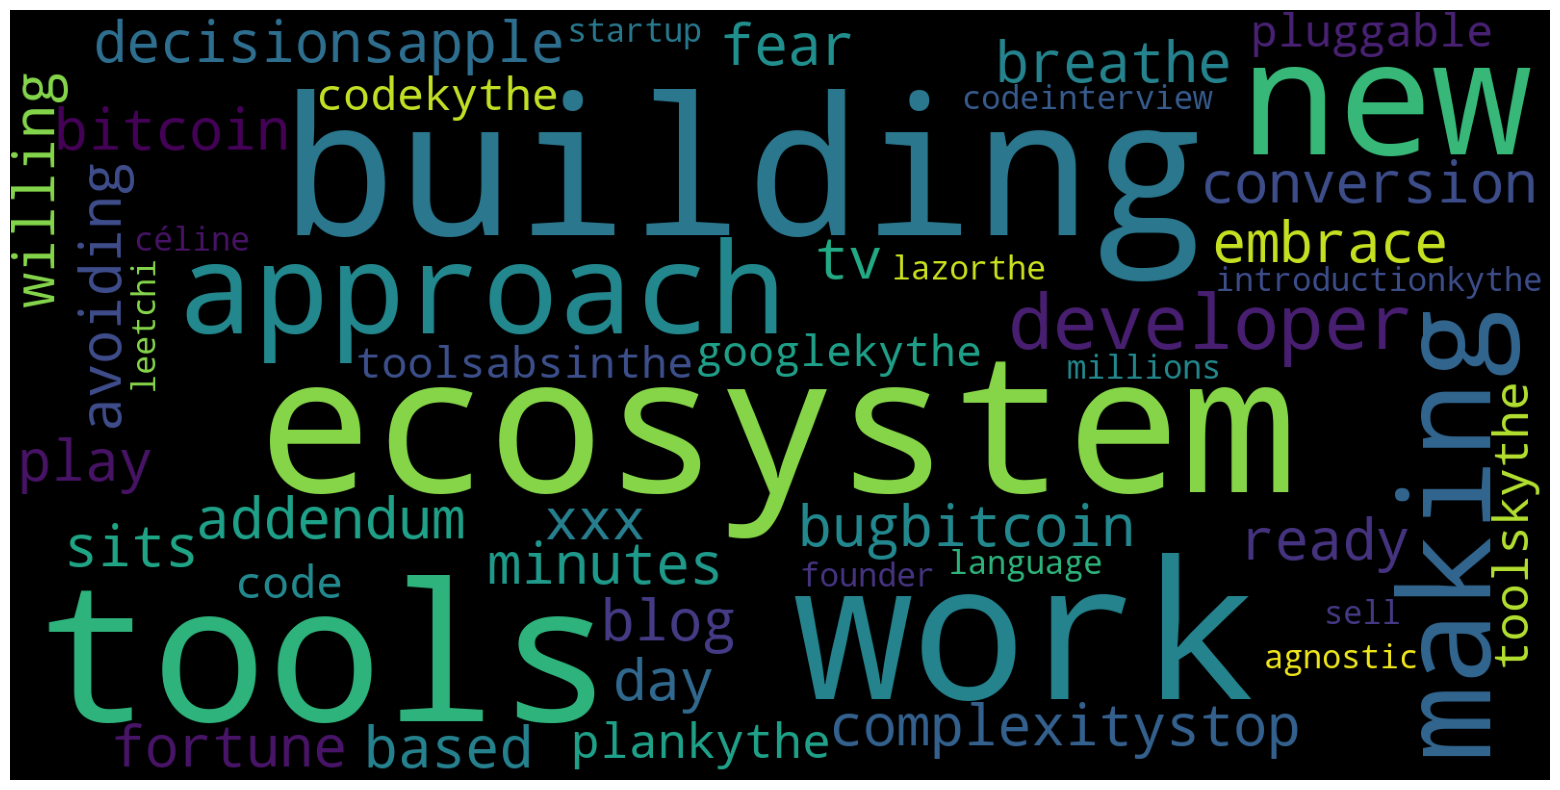

In [40]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [41]:
#HN
query="""SELECT title, time_ts
FROM `bigquery-public-data.hacker_news.stories`
WHERE REGEXP_CONTAINS(title, r'HN:\p{Zs}+')
ORDER BY time_ts"""

In [42]:
query_job=client.query(query)
iterator = query_job.result(timeout=30)
rows = list(iterator)

# Transform the rows into a nice pandas dataframe
headlines = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

In [43]:
words= ''.join(headlines.title).lower()

In [44]:
cloud=wordcloud.WordCloud(background_color='black',max_font_size=200,width=1600,height=800,relative_scaling=0.5).generate(words)

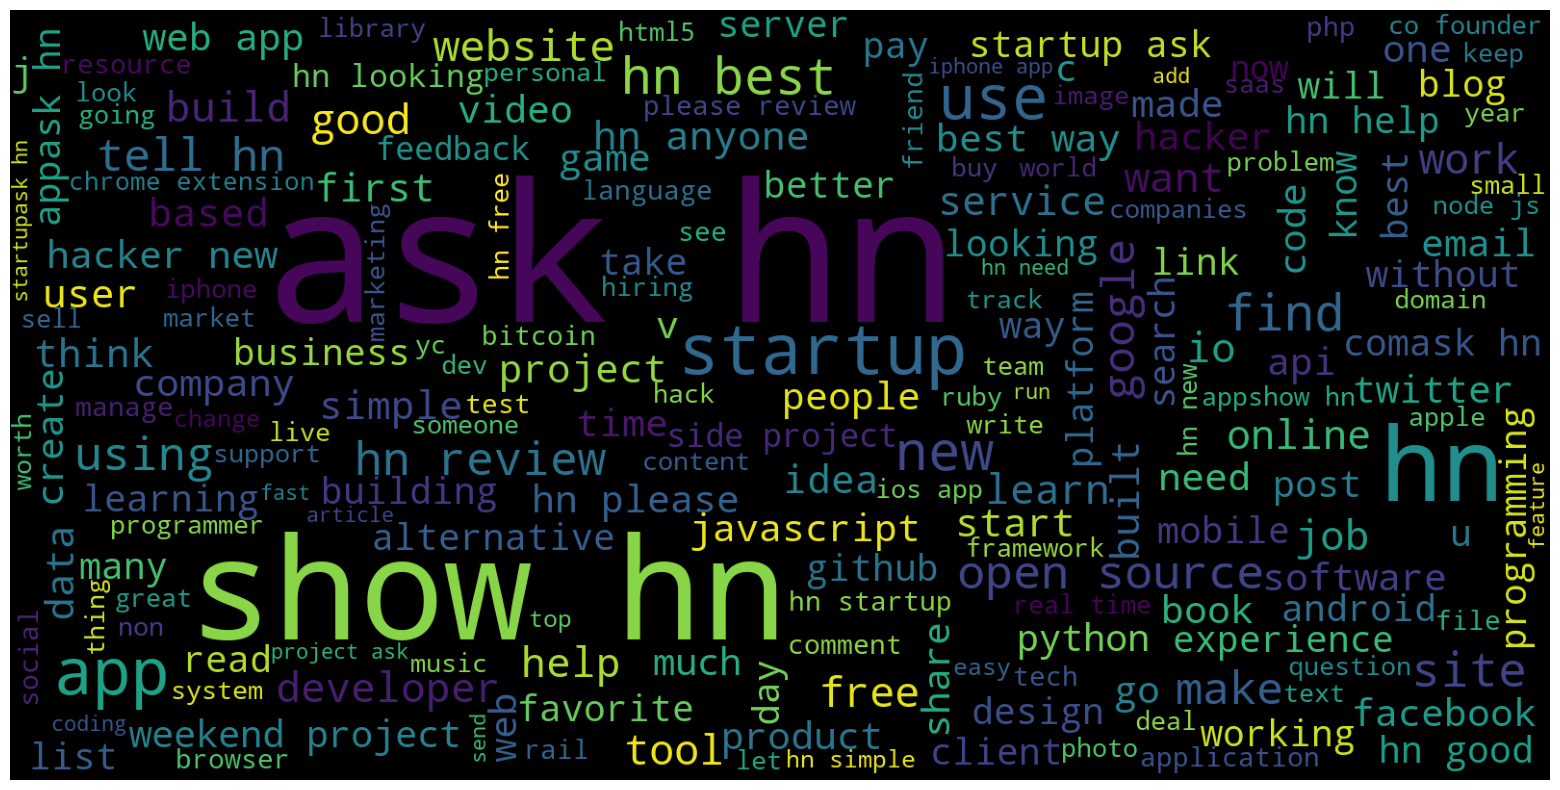

In [45]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

# Query 3

# Is the amount of coverage by Hacker News predictive of a startup’s
# success?

In [46]:
query = """
SELECT title, time_ts
FROM `bigquery-public-data.hacker_news.stories`
WHERE REGEXP_CONTAINS(title, r'startup success:\\p{Zs}+')
ORDER BY time_ts
"""

query_job = client.query(query)
iterator = query_job.result(timeout=30)
rows = list(iterator)

# Check if there are any rows returned
if len(rows) == 0:
    print("No results found.")
else:
    # Transform the rows into a pandas dataframe
    headlines = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

    # Print the first 10 rows
    print(headlines.head(10))


                                             title                   time_ts
0  The story behind the 2010 startup success: Siri 2010-08-10 17:42:54+00:00
1  The story behind the 2010 startup success: Siri 2010-08-24 18:29:43+00:00
2         The key to startup success: build simply 2014-05-27 13:30:19+00:00


In [47]:
words= ''.join(headlines.title).lower()

In [48]:
cloud=wordcloud.WordCloud(background_color='black',max_font_size=200,width=1600,height=800,relative_scaling=0.5).generate(words)

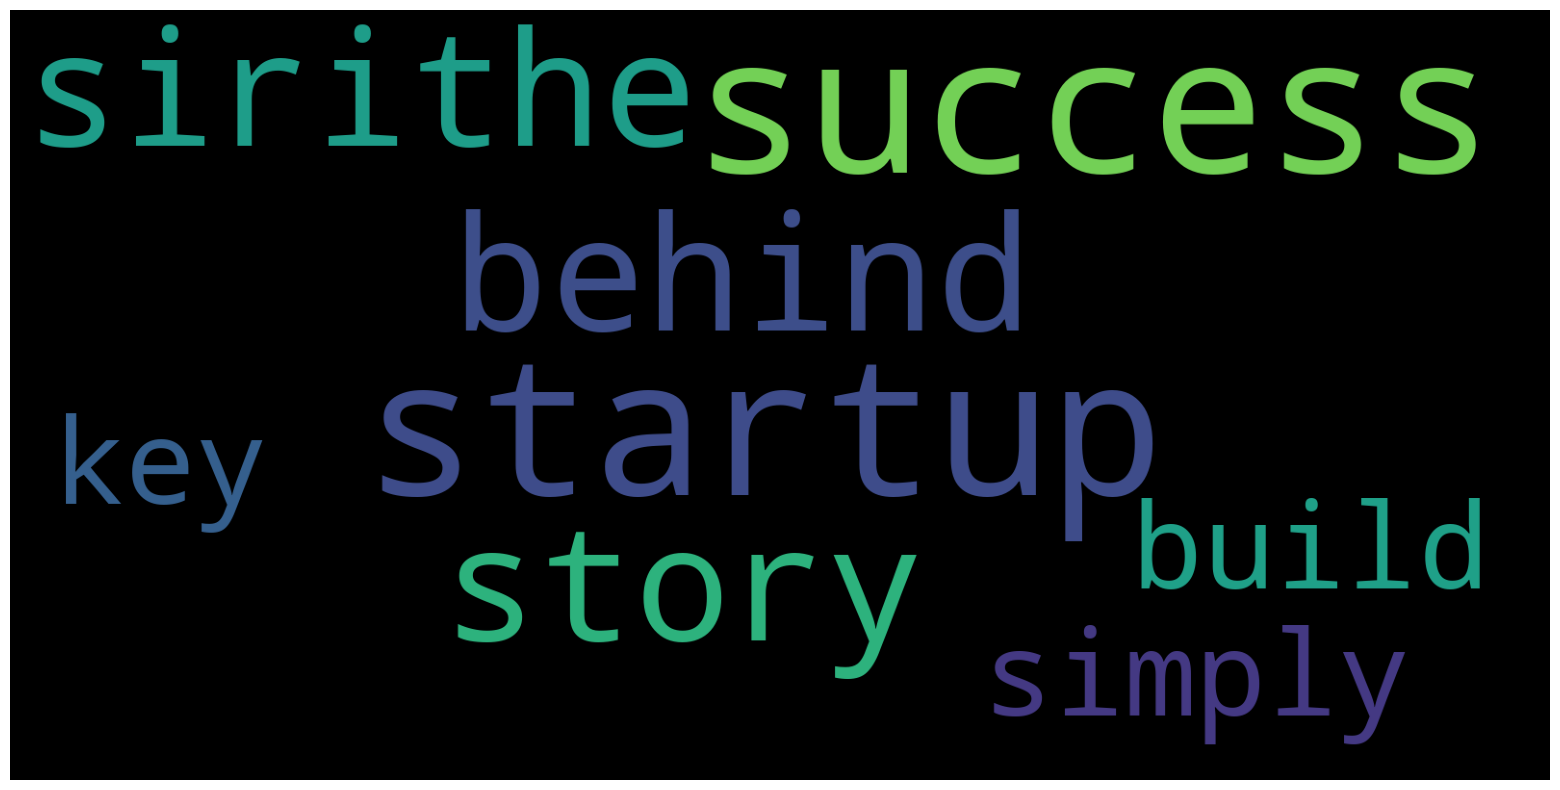

In [49]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(cloud)
plt.show()